In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import date, time, datetime, timedelta
from dateutil import parser

In [18]:
weather = pd.read_csv("/Users/florianlichius/Daten/Boston")
#transform timestamp to datetime and filter for 2017 and 2018
weather['timestamp'] = pd.to_datetime(weather['timestamp'])
weather = weather[(weather['timestamp'].dt.year >= 2017) & (weather['timestamp'].dt.year <= 2018)]
weather.reset_index(drop=True, inplace=True)


In [19]:
weather

,city,timestamp,temperature,cloud_cover,cloud_cover_description,pressure,windspeed,precipitation,felt_temperature
0,Boston,2017-01-01 00:54:00,4.0,26,Cloudy,1013.50,13.0,0.00,1.0
1,Boston,2017-01-01 01:54:00,5.0,11,Light Rain,1012.49,20.0,0.00,1.0
2,Boston,2017-01-01 02:54:00,5.0,11,Light Rain,1011.81,24.0,0.51,1.0
3,Boston,2017-01-01 03:33:00,5.0,11,Light Rain / Windy,1011.47,39.0,0.51,-1.0
4,Boston,2017-01-01 03:54:00,4.0,11,Light Rain,1011.47,30.0,0.51,-1.0
...,...,...,...,...,...,...,...,...,...
21095,Boston,2018-12-31 19:54:00,7.0,26,Cloudy,1025.01,17.0,0.00,3.0
21096,Boston,2018-12-31 20:54:00,6.0,26,Cloudy,1024.33,20.0,0.00,2.0
21097,Boston,2018-12-31 21:54:00,6.0,26,Cloudy,1024.33,15.0,0.00,2.0
21098,Boston,2018-12-31 22:54:00,6.0,26,Cloudy,1024.67,17.0,0.00,2.0


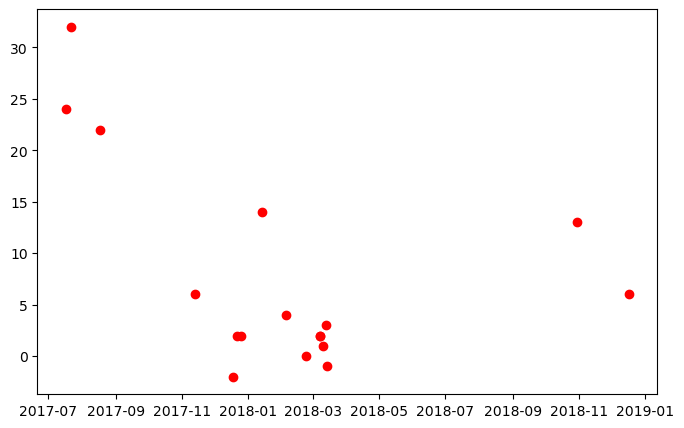

In [12]:
null_values = weather[weather.isnull().any(axis=1)].copy()
fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(null_values['timestamp'], null_values['temperature'],color='red')

In [24]:
#count the proportion of null values
weather.isnull().sum().sum()/len(weather)

0.0014691943127962085

In [11]:
#drop all rows with null values
weather = weather.dropna(axis=0, how='any')

/var/folders/35/nxlk80897mn6vmrkstqf1cg80000gn/T/ipykernel_11147/1895593093.py:1: FutureWarning: The default value of numeric_only in DataFrame.sum is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  weather1718.sum()


city                       BostonBostonBostonBostonBostonBostonBostonBost...
temperature                                                         239073.0
cloud_cover                                                           546331
cloud_cover_description    CloudyLight RainLight RainLight Rain / WindyLi...
pressure                                                         21390284.86
windspeed                                                           389382.0
precipitation                                                        4350.07
felt_temperature                                                    196963.0
dtype: object

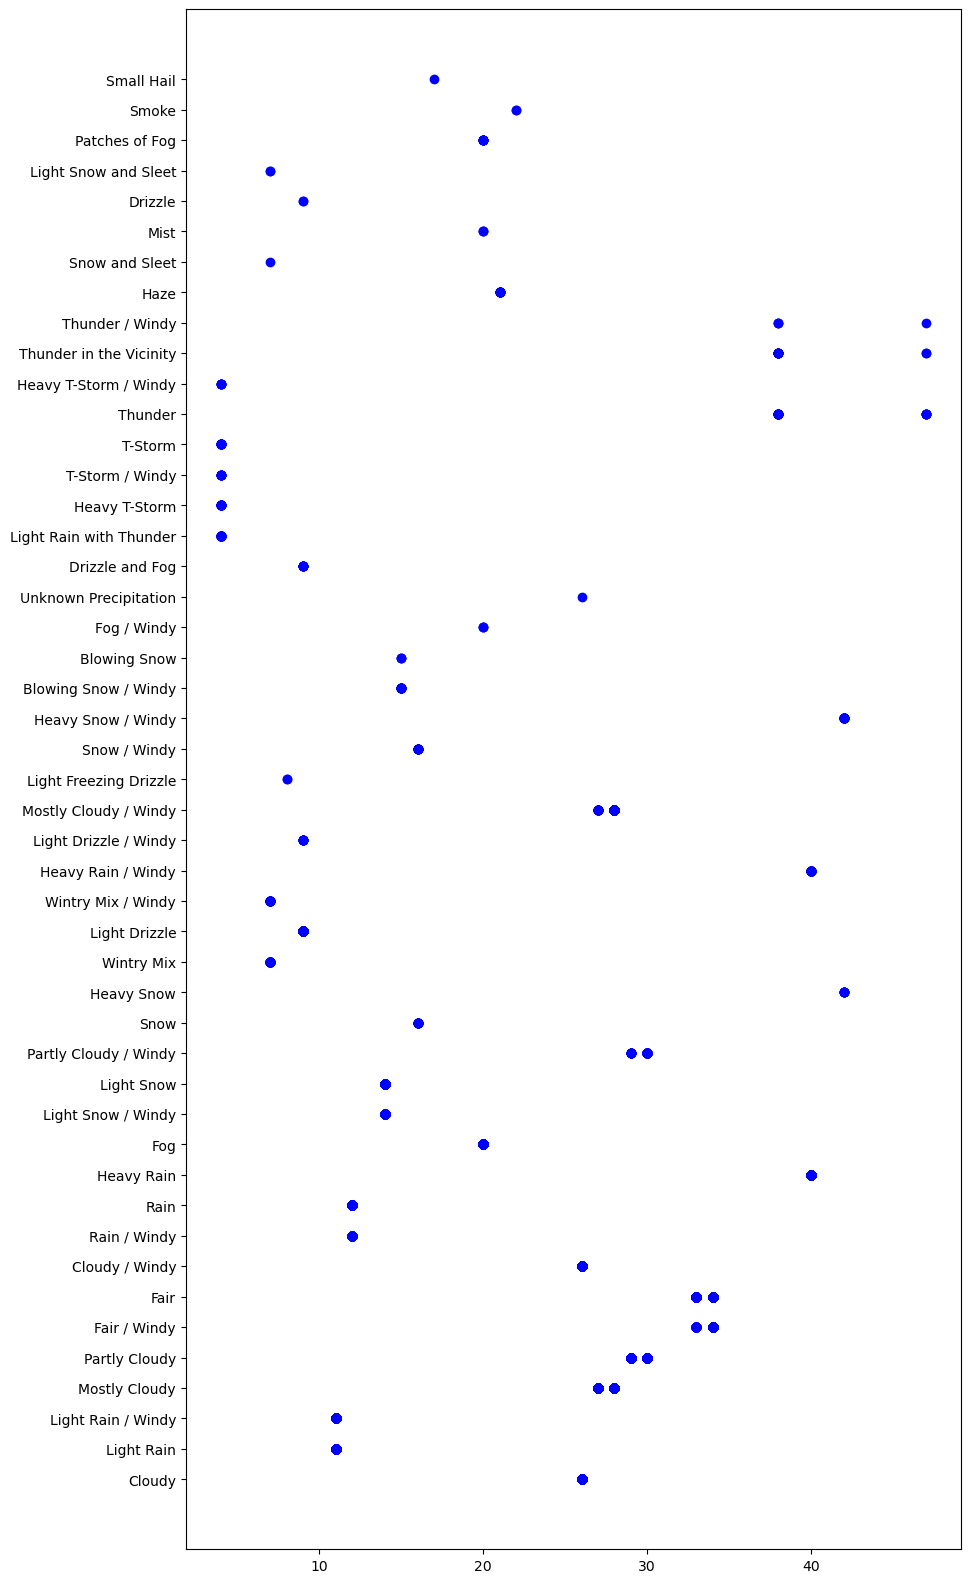

In [49]:
#plot cloudcover against cloud_cover_description use a different color
fig, ax = plt.subplots(figsize=(10,20))
ax.scatter(weather['cloud_cover'],weather['cloud_cover_description'],color='blue')

In [58]:
mostCloudy = weather1718[weather1718['cloud_cover_description'] == 'Mostly Cloudy'].copy()
#print(mostCloudy.describe())
print(mostCloudy.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3299 entries, 20526 to 41578
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   city                     3299 non-null   object        
 1   timestamp                3299 non-null   datetime64[ns]
 2   temperature              3299 non-null   float64       
 3   cloud_cover              3299 non-null   int64         
 4   cloud_cover_description  3299 non-null   object        
 5   pressure                 3299 non-null   float64       
 6   windspeed                3299 non-null   float64       
 7   precipitation            3299 non-null   float64       
 8   felt_temperature         3299 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(1), object(2)
memory usage: 257.7+ KB
None


In [59]:
partlyCloudy = weather1718[weather1718['cloud_cover_description'] == 'Partly Cloudy'].copy()
partlyCloudy.describe()

,temperature,cloud_cover,pressure,windspeed,precipitation,felt_temperature
count,1816.000000,1816.000000,1816.000000,1816.000000,1816.000000,1816.000000
mean,14.549009,29.627753,1016.162230,17.847467,0.002236,13.144824
std,10.452401,0.483537,7.840952,6.774313,0.083944,12.737851
min,-14.000000,29.000000,989.480000,0.000000,0.000000,-22.000000
25%,6.000000,29.000000,1011.470000,13.000000,0.000000,2.000000
50%,17.000000,30.000000,1015.870000,19.000000,0.000000,17.000000
75%,23.000000,30.000000,1020.610000,22.000000,0.000000,23.000000
max,36.000000,30.000000,1043.280000,31.000000,3.560000,39.000000


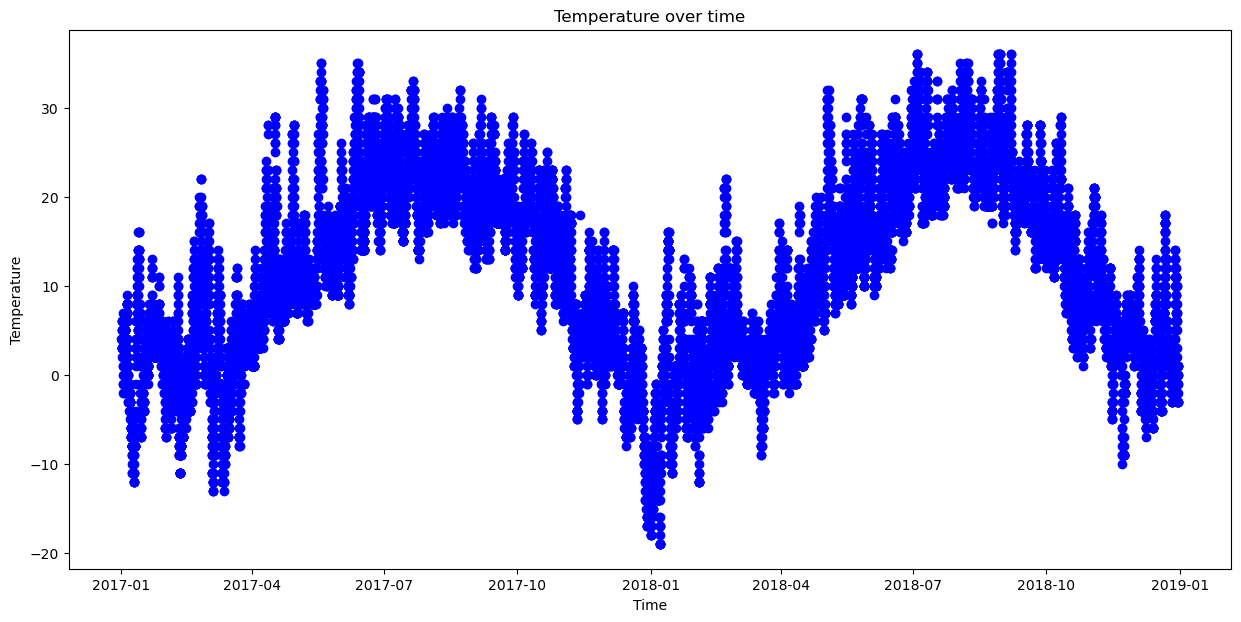

In [41]:
#plot weather data tempature as y and x as time
fig, ax = plt.subplots(figsize=(15,7))
ax.scatter(weather1718['timestamp'], weather1718['temperature'], color='blue')
ax.set_xlabel('Time')
ax.set_ylabel('Temperature')
ax.set_title('Temperature over time')
plt.show()

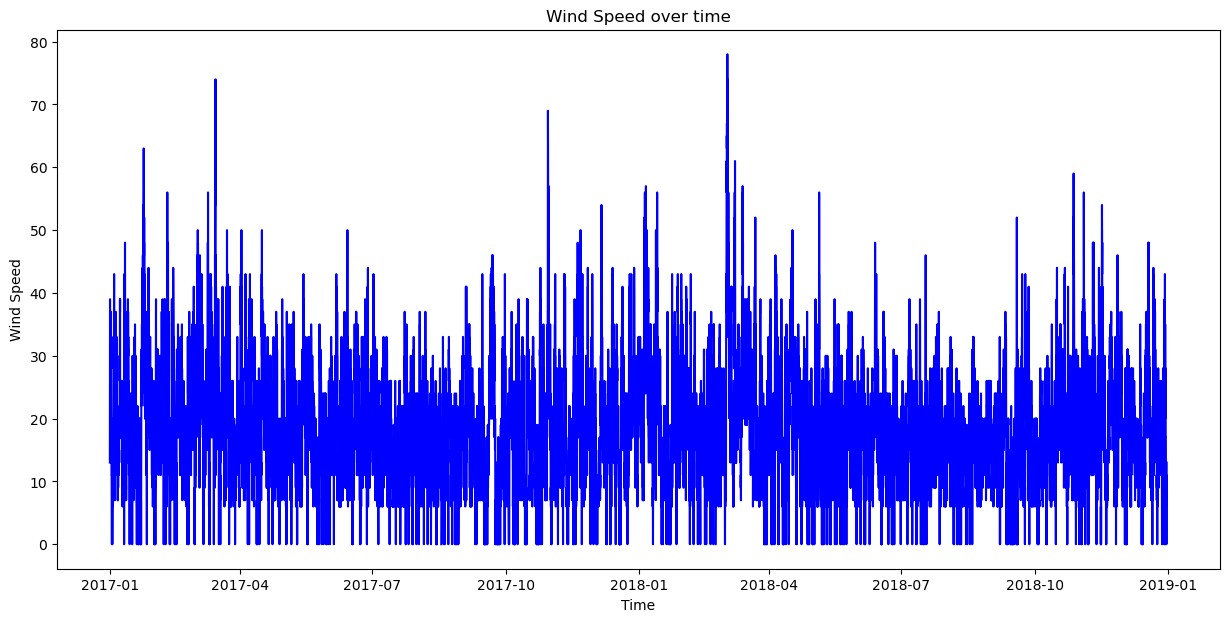

In [13]:
#plot windspeed over time
fig, ax = plt.subplots(figsize=(15,7))
ax.plot(weather1718['timestamp'], weather1718['windspeed'], color='blue')
ax.set_xlabel('Time')
ax.set_ylabel('Wind Speed')
ax.set_title('Wind Speed over time')
plt.show()

{'whiskers': [<matplotlib.lines.Line2D at 0x13f2c08b0>,
 'caps': [<matplotlib.lines.Line2D at 0x13f2c0df0>,
 'boxes': [<matplotlib.lines.Line2D at 0x13f2c0610>,
 'medians': [<matplotlib.lines.Line2D at 0x13f262d70>,
 'fliers': [<matplotlib.lines.Line2D at 0x13f260df0>,
 'means': []}

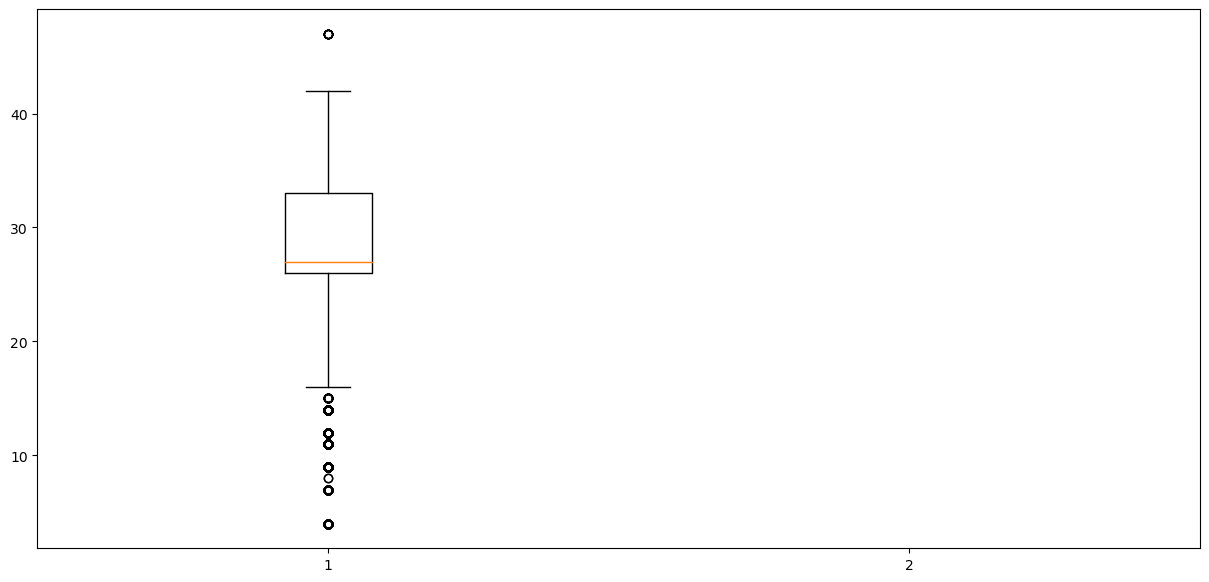

In [14]:
#boxplot cloud cover and pressure 
fig, ax = plt.subplots(figsize=(15,7))



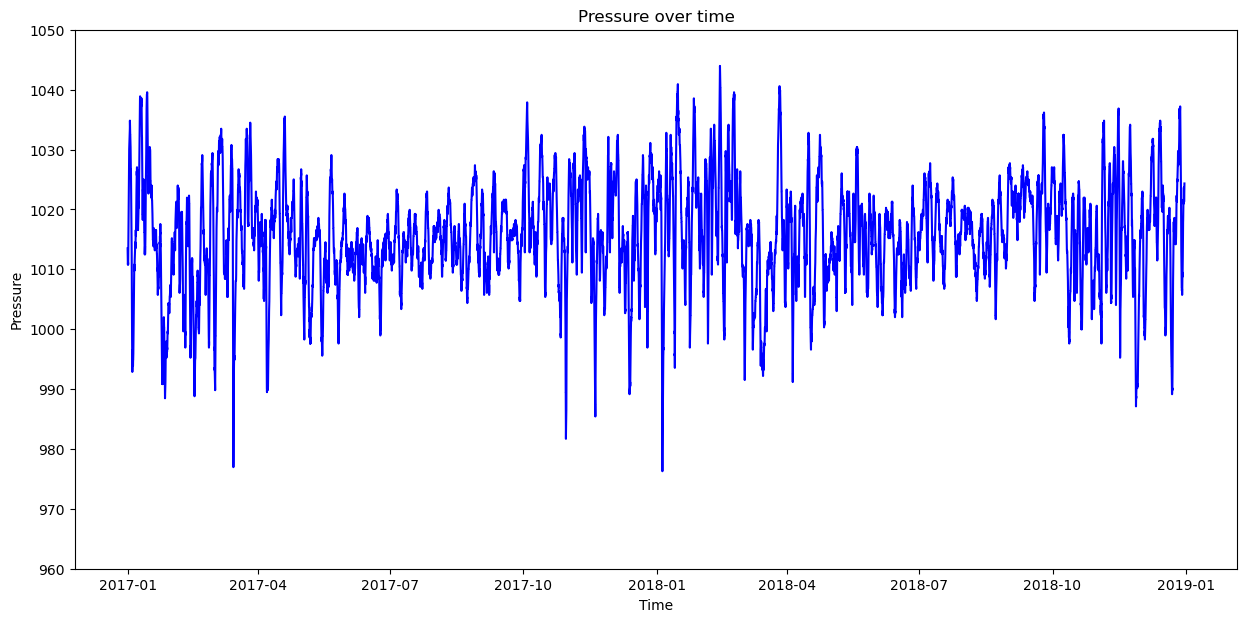

In [43]:
#plot pressure over time 
fig, ax = plt.subplots(figsize=(15,7))
ax.plot(weather1718['timestamp'], weather1718['pressure'], color='blue')
ax.set_ylim(960,1050)
ax.set_xlabel('Time')
ax.set_ylabel('Pressure')
ax.set_title('Pressure over time')
plt.show()

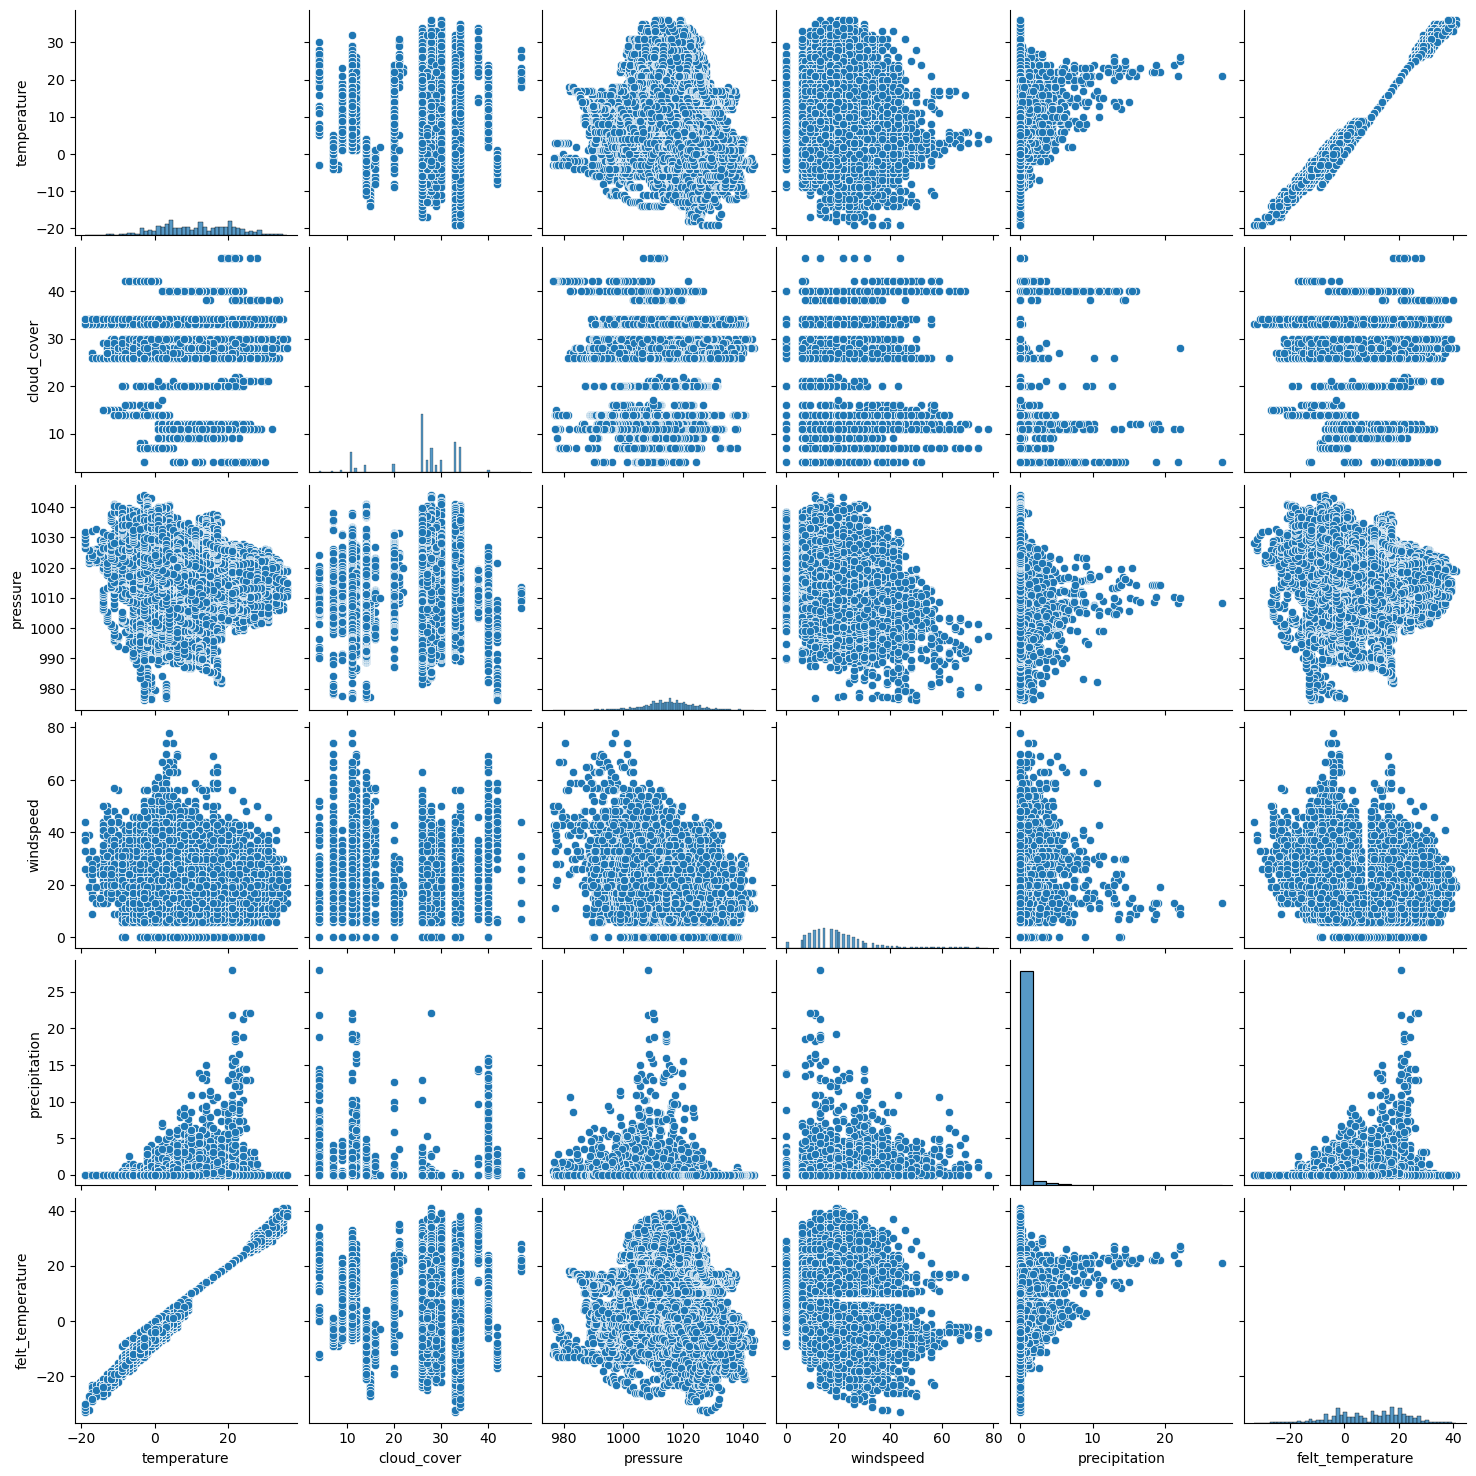

In [44]:
import seaborn as sns
sns.pairplot(weather1718)